In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
import matplotlib
import matplotlib.patches as mpatches
import re
%matplotlib inline

/home/gabriel/.local/lib/python3.8/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/gabriel/.local/lib/python3.8/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df= pd.read_csv('pktypes.csv')
df.head(3)

,pokedex,name,type1,type2,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,...,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,generation,is_legendary
0,1,Bulbasaur,grass,poison,1.0,1.0,1.0,0.5,0.5,0.5,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,1,False
1,2,Ivysaur,grass,poison,1.0,1.0,1.0,0.5,0.5,0.5,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,1,False
2,3,Venusaur,grass,poison,1.0,1.0,1.0,0.5,0.5,0.5,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,1,False


In [3]:
print(df.shape)
df.info()

(801, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 24 columns):
pokedex             801 non-null int64
name                801 non-null object
type1               801 non-null object
type2               417 non-null object
against_bug         801 non-null float64
against_dark        801 non-null float64
against_dragon      801 non-null float64
against_electric    801 non-null float64
against_fairy       801 non-null float64
against_fight       801 non-null float64
against_fire        801 non-null float64
against_flying      801 non-null float64
against_ghost       801 non-null float64
against_grass       801 non-null float64
against_ground      801 non-null float64
against_ice         801 non-null float64
against_normal      801 non-null float64
against_poison      801 non-null float64
against_psychic     801 non-null float64
against_rock        801 non-null float64
against_steel       801 non-null float64
against_water       801 non-n

In [4]:
print(df.generation.value_counts(sort= False))

1    151
2    100
3    135
4    107
5    156
6     72
7     80
Name: generation, dtype: int64


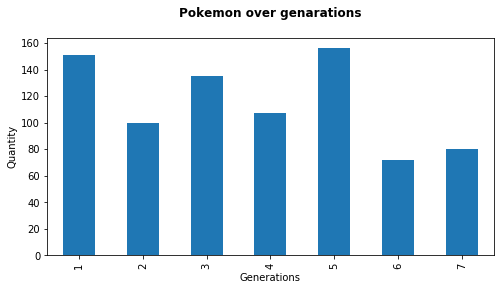

In [5]:
df.generation.value_counts(sort =False).plot.bar(figsize =(8,4), colormap = 'tab20')
plt.title('Pokemon over genarations\n',weight ='bold')
plt.xlabel('Generations')
plt.ylabel('Quantity')
plt.show()

In [6]:
df[df.is_legendary].generation.value_counts(sort = False)

1     5
2     6
3    10
4    13
5    13
6     6
7    17
Name: generation, dtype: int64

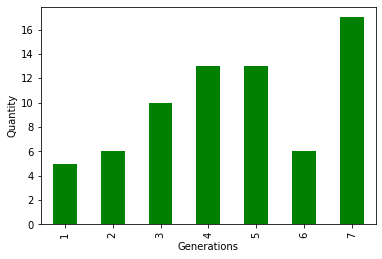

In [7]:
df[df.is_legendary].generation.value_counts(sort = False).plot.bar(x = 'generation',fc='green', figsize =(6,4))
plt.xlabel('Generations')
plt.ylabel('Quantity')
plt.show()

In [8]:
df.groupby(['generation', 'type1']).generation.count().unstack().fillna(0)

type1,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
generation,,,,,,,,,,,,,,,,,,
1,12.0,0.0,3.0,9.0,2.0,7.0,12.0,0.0,3.0,12.0,8.0,2.0,22.0,14.0,8.0,9.0,0.0,28.0
2,10.0,5.0,0.0,6.0,5.0,2.0,8.0,0.0,1.0,9.0,3.0,4.0,15.0,1.0,7.0,4.0,2.0,18.0
3,12.0,4.0,7.0,4.0,0.0,4.0,6.0,0.0,4.0,12.0,6.0,6.0,18.0,3.0,8.0,8.0,9.0,24.0
4,8.0,3.0,3.0,7.0,1.0,2.0,5.0,0.0,6.0,13.0,4.0,3.0,17.0,6.0,7.0,6.0,3.0,13.0
5,18.0,13.0,7.0,7.0,0.0,7.0,8.0,1.0,5.0,15.0,9.0,6.0,17.0,2.0,14.0,6.0,4.0,17.0
6,3.0,3.0,4.0,3.0,9.0,3.0,8.0,2.0,4.0,5.0,0.0,2.0,4.0,2.0,3.0,8.0,4.0,5.0
7,9.0,1.0,3.0,3.0,1.0,3.0,5.0,0.0,4.0,12.0,2.0,0.0,12.0,4.0,6.0,4.0,2.0,9.0


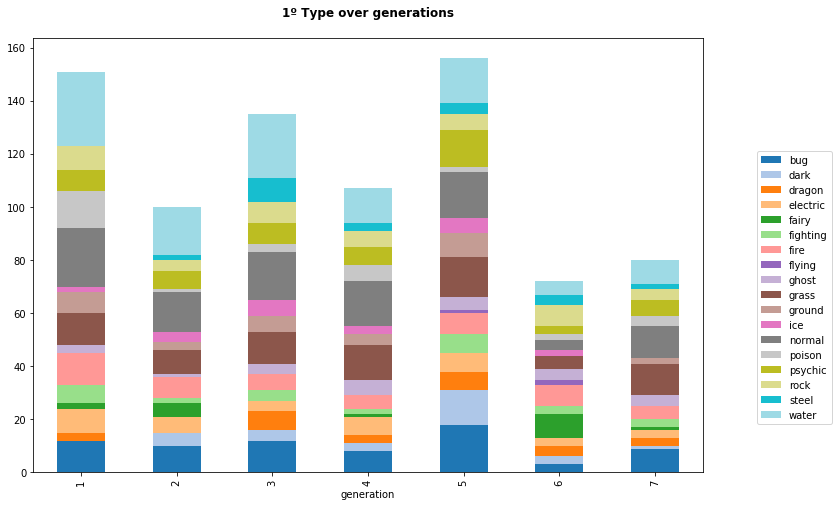

In [9]:
df.groupby(['generation', 'type1']).generation.count().unstack().fillna(0)\
                                    .plot.bar(stacked= True, figsize = (12,8),\
                                    colormap = 'tab20').legend(bbox_to_anchor=(1.2, .75))
plt.title('1º Type over generations\n', weight = 'bold')
plt.show()

In [10]:
df.groupby(['generation', 'type2']).generation.count().unstack().fillna(0)

type2,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
generation,,,,,,,,,,,,,,,,,,
1,0.0,4.0,0.0,1.0,3.0,1.0,1.0,19.0,0.0,2.0,8.0,7.0,0.0,21.0,6.0,2.0,2.0,4.0
2,0.0,1.0,1.0,2.0,3.0,1.0,2.0,19.0,0.0,1.0,7.0,1.0,0.0,3.0,3.0,3.0,2.0,0.0
3,2.0,6.0,2.0,0.0,5.0,3.0,0.0,12.0,2.0,5.0,7.0,0.0,0.0,2.0,12.0,4.0,0.0,4.0
4,1.0,4.0,3.0,0.0,1.0,5.0,0.0,14.0,2.0,2.0,6.0,3.0,0.0,2.0,2.0,1.0,7.0,1.0
5,0.0,3.0,3.0,4.0,2.0,8.0,8.0,17.0,4.0,5.0,2.0,1.0,0.0,5.0,1.0,4.0,8.0,0.0
6,0.0,2.0,5.0,0.0,4.0,1.0,0.0,6.0,4.0,4.0,2.0,2.0,4.0,0.0,3.0,0.0,0.0,4.0
7,2.0,1.0,3.0,2.0,11.0,6.0,2.0,8.0,2.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0,3.0,4.0


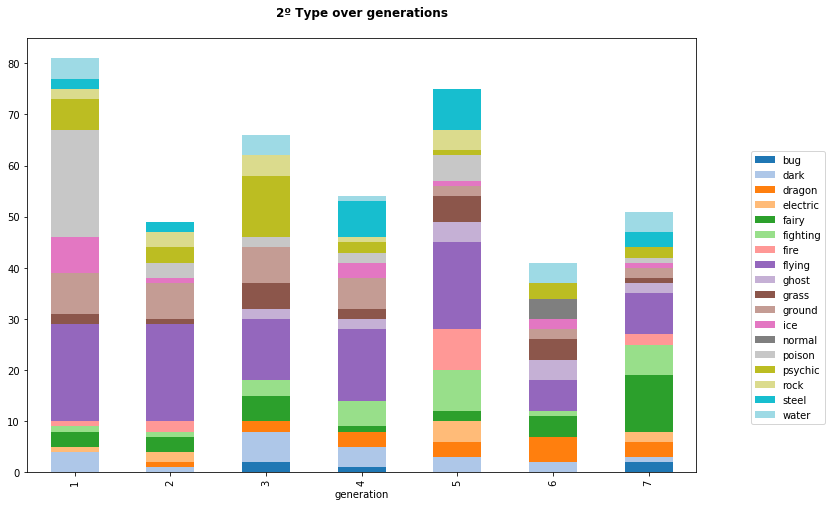

In [11]:
df.groupby(['generation', 'type2']).generation.count().unstack().fillna(0)\
                                    .plot.bar(stacked= True, figsize = (12,8),\
                                    colormap = 'tab20').legend(bbox_to_anchor=(1.2, .75))
plt.title('2º Type over generations\n', weight = 'bold')
plt.show()

In [12]:
types = pd.concat([df.type1, df.type2])
print('Percentage of each type')
types.value_counts(sort = False).apply(lambda x: x*100/801).round(2)
# Total of Pokemons == 801

Percentage of each type


steel        5.74
fire         8.11
electric     5.99
ground       8.24
rock         7.37
water       16.35
ice          4.74
ghost        5.12
psychic     10.24
bug          9.61
fairy        5.87
normal      13.61
dragon       5.49
dark         6.24
poison       8.24
fighting     6.62
flying      12.23
grass       12.23
dtype: float64

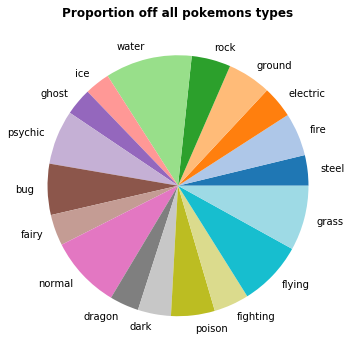

In [13]:
types.value_counts(sort =False).plot.pie(y= 'index', figsize= (6,6), colormap = 'tab20')
plt.ylabel('')
plt.title('Proportion off all pokemons types', weight ='bold')
plt.show()

In [14]:
types = pd.concat([df[~df.is_legendary].type1, df[~df.is_legendary].type2])
print('Percentage of each  non- legedary type')
types.value_counts(sort = False).apply(lambda x: x*100/801).round(2) 
# Total of Pokemons == 801

Percentage of each  non- legedary type


steel        4.49
fire         7.24
electric     5.24
ground       7.87
rock         6.87
water       15.48
ice          4.37
ghost        4.74
psychic      7.62
bug          9.24
fairy        4.99
normal      13.23
dragon       4.12
dark         5.87
poison       8.11
fighting     5.87
flying      10.86
grass       11.49
dtype: float64

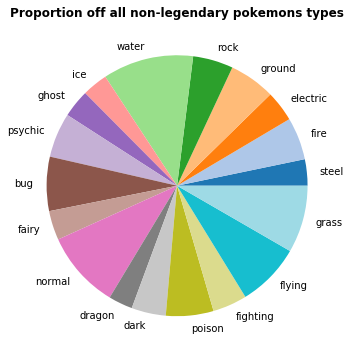

In [15]:
types.value_counts(sort =False).plot.pie(y= 'index', figsize= (6,6), colormap = 'tab20')
plt.ylabel('')
plt.title('Proportion off all non-legendary pokemons types', weight ='bold')
plt.show()

In [16]:
types = pd.concat([df[df.is_legendary].type1, df[df.is_legendary].type2])
print('Percentage of each legedary type')
types.value_counts(sort = False).apply(lambda x: x*100/801).round(2) 
# Total of Pokemons == 801

Percentage of each legedary type


dark        0.37
steel       1.25
bug         0.37
rock        0.50
poison      0.12
fighting    0.75
grass       0.75
fire        0.87
electric    0.75
flying      1.37
psychic     2.62
fairy       0.87
ice         0.37
normal      0.37
ground      0.37
ghost       0.37
dragon      1.37
water       0.87
dtype: float64

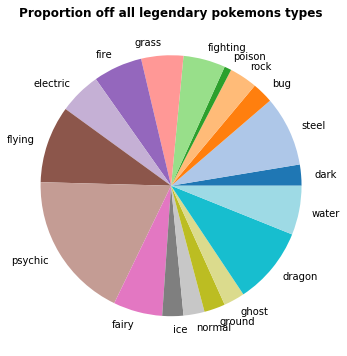

In [17]:
types.value_counts(sort =False).plot.pie(y= 'index', figsize= (6,6), colormap = 'tab20')
plt.ylabel('')
plt.title('Proportion off all legendary pokemons types', weight ='bold')
plt.show()

In [18]:
df[df.name == 'Pikachu']

,pokedex,name,type1,type2,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,...,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,generation,is_legendary
24,25,Pikachu,electric,NaN,1.0,1.0,1.0,0.5,1.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1,False


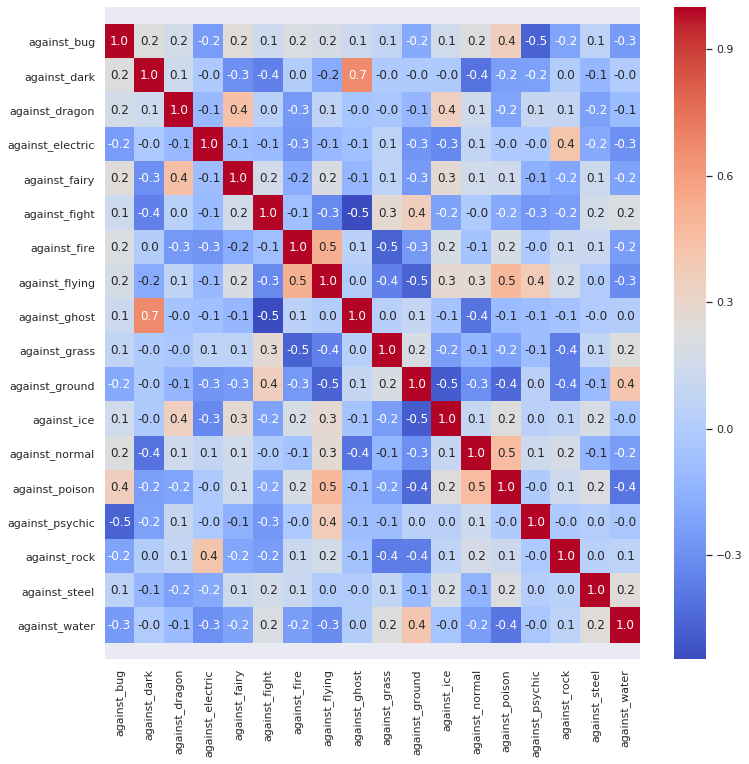

In [46]:
corr = df.loc[:, 'against_bug':'against_water'].corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        cmap = 'coolwarm', 
        annot = True, fmt = '.1f')
plt.ylim(corr.columns.size+0.5, -0.5)
sns.set({'figure.figsize':(12,12)})
plt.show()

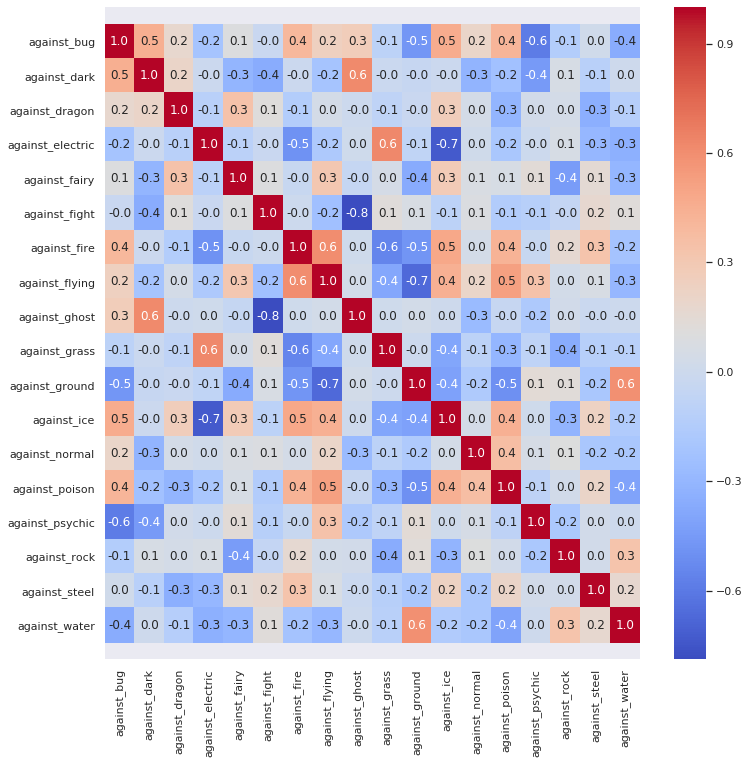

In [47]:
corr = df[df.type2.isnull()].loc[:, 'against_bug':'against_water'].corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.index, 
        cmap = 'coolwarm', 
        annot = True, fmt='.1f')
sns.set(rc={'figure.figsize':(12, 12)})
plt.ylim(corr.columns.size+0.5, -0.5)
plt.show()

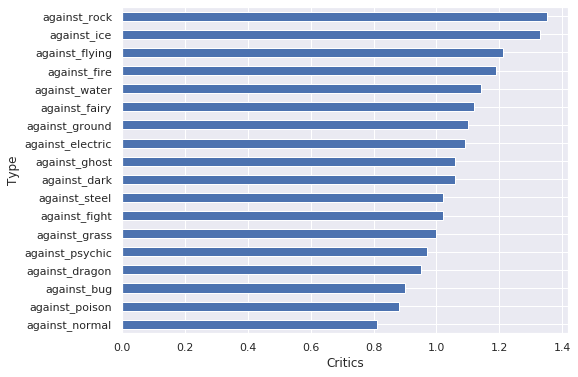

In [21]:
cols = df.columns[4:-2]
df.groupby(['type1', 'type2', 'generation'])[cols].mean().mean().sort_values().round(2).plot.barh(figsize=(8,6))
plt.ylabel('Type')
# plt.xticks(rotation = 45)
plt.xlabel('Critics')
plt.show()

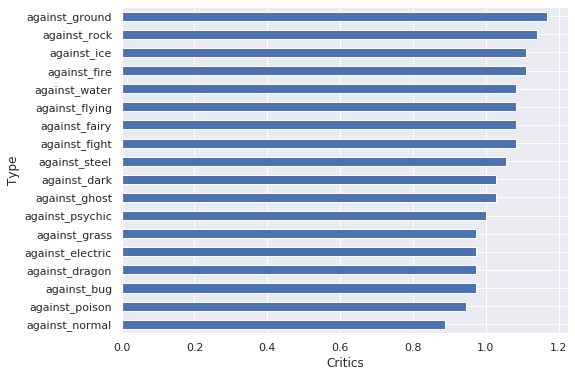

In [22]:
df[df.type2.isnull()].groupby(['type1'])[cols].mean().mean().sort_values().plot.barh(figsize=(8,6))
plt.ylabel('Type')
# plt.xticks(rotation = 45)
plt.xlabel('Critics')
plt.show()

In [23]:
best_silver =df[~df.is_legendary].loc[:251, 'against_bug':'against_water']\
                    .mean(axis = 1).sort_values(ascending= True)[:84].index
best_silver

Int64Index([226, 207, 211, 204,  81,  80, 183,  71,  72,  38, 199, 173,  39,
            182, 210, 170, 169, 134, 209, 124,  88,  91, 109, 108,  35, 100,
             99,  93,  92,  87, 238,  34, 208,  25, 171, 172,  23, 174,  24,
            178, 179, 180,  22,  32,  28,  29,  31,  40, 168,  41, 162, 107,
            161, 163, 217, 154,  97, 223,  98, 216, 227, 185, 193, 194, 222,
            112, 116, 114, 155, 142, 156, 205, 157, 136, 135, 133, 132, 215,
            131, 127, 125, 158, 159, 119],
           dtype='int64')

In [24]:
types = pd.concat([df.iloc[best_silver].type1, df.iloc[best_silver].type2])

poison      21
water       20
normal      17
electric    16
fairy       11
fire         7
flying       6
steel        6
ghost        4
ground       3
bug          2
dark         1


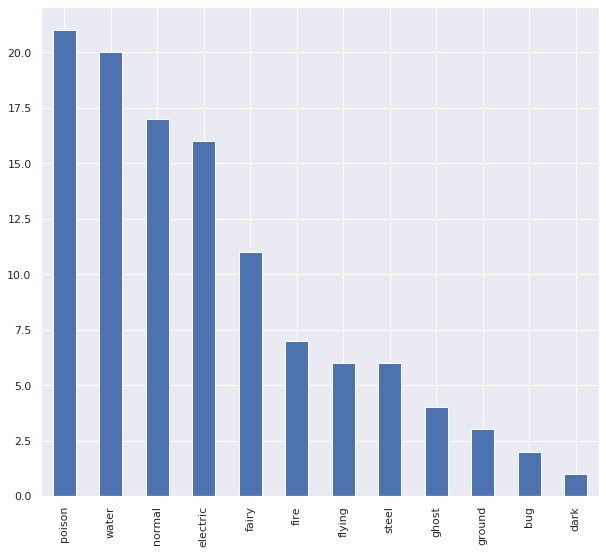

In [25]:
print(types.value_counts(sort = True).to_string())
types.value_counts(sort =True).plot.bar(figsize=(10,9))
plt.show()

           name     type1
226    Skarmory     steel
207     Steelix     steel
211      Scizor       bug
204  Forretress       bug
81     Magneton  electric
..          ...       ...
127      Tauros    normal
125      Magmar      fire
158    Croconaw     water
159  Feraligatr     water
119      Staryu     water

[84 rows x 2 columns]


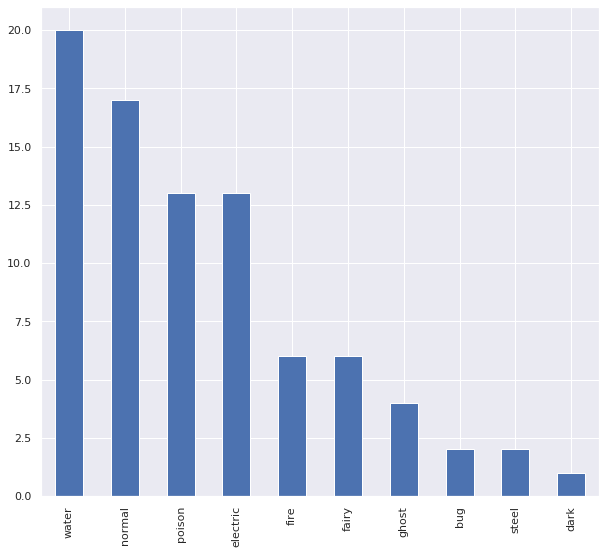

In [26]:
df.iloc[best_silver]['type1'].value_counts(sort= True).plot.bar(figsize =(10,9))
print(df.iloc[best_silver][['name', 'type1']])
plt.show()

In [27]:
df[(~df.is_legendary) & (df.generation < 3)].loc[:,'against_bug': 'against_water'].mean().sort_values(ascending = False).round(3)

against_rock        1.276
against_ice         1.178
against_flying      1.160
against_grass       1.150
against_electric    1.135
against_ground      1.131
against_psychic     1.121
against_water       1.120
against_fire        1.078
against_dark        1.035
against_fight       1.026
against_steel       0.962
against_fairy       0.954
against_dragon      0.950
against_poison      0.949
against_normal      0.933
against_ghost       0.929
against_bug         0.928
dtype: float64

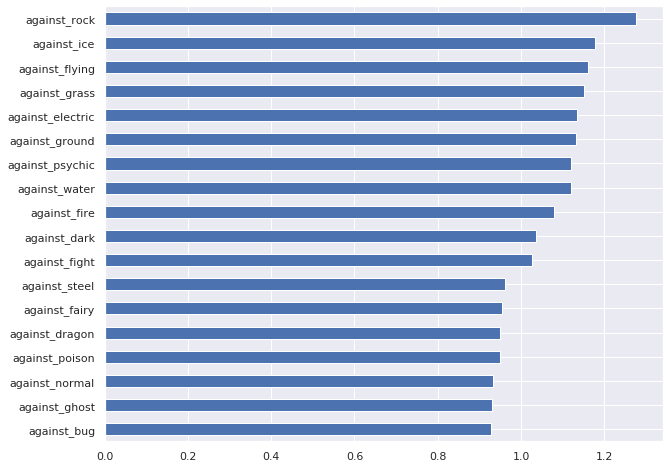

In [28]:
df[(~df.is_legendary) & (df.generation < 3)].loc[:,'against_bug': 'against_water']\
                                .mean().sort_values().plot.barh( figsize = (10, 8))
plt.show()

water       49
poison      39
normal      37
flying      33
ground      26
grass       23
bug         22
psychic     20
fire        20
rock        18
electric    16
fairy       13
ice         13
fighting    11
dark        10
steel        6
dragon       4
ghost        4
dtype: int64


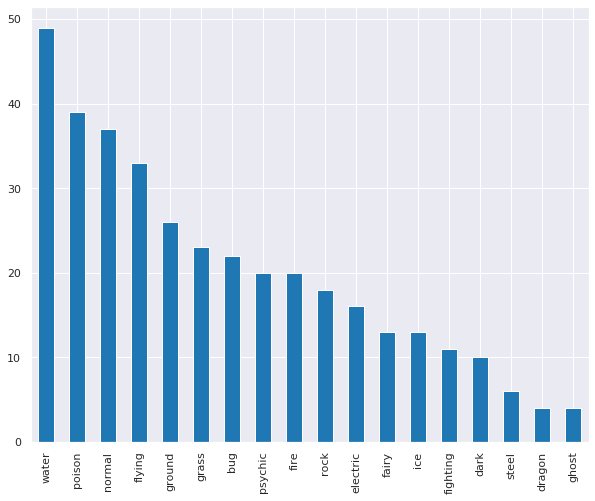

In [29]:
types = pd.concat([df[(~df.is_legendary) & (df.generation < 3)].type1,\
                   df[(~df.is_legendary) & (df.generation < 3)].type2 ])
print(types.dropna().value_counts())
types.dropna().value_counts().plot.bar(figsize =(10,8),cmap ='tab20')
plt.show()

rock      26
water      5
ground     5
bug        4
steel      3
fire       2


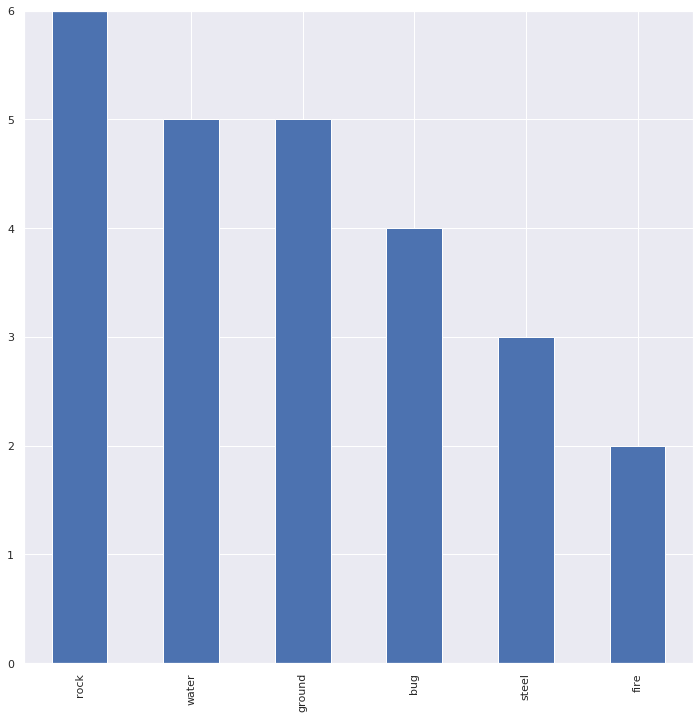

In [30]:
pd.concat([df[((df.type2 =='rock' )|(df.type1 == 'rock')) & (df.generation < 3)].type1,\
           df[(df.type2 =='rock' )|(df.type1 == 'rock') & (df.generation < 3)].type1]).value_counts().plot.bar()
print(pd.concat([df[(df.type2 =='rock' )|(df.type1 == 'rock') & (df.generation < 3)].type1,\
           df[((df.type2 =='rock' )|(df.type1 == 'rock') )& (df.generation < 3)].type1]).value_counts().to_string())
plt.ylim(0,6)
plt.show()

ice         12
water        6
fire         4
ground       4
dark         3
grass        2
rock         2
dragon       1
fighting     1


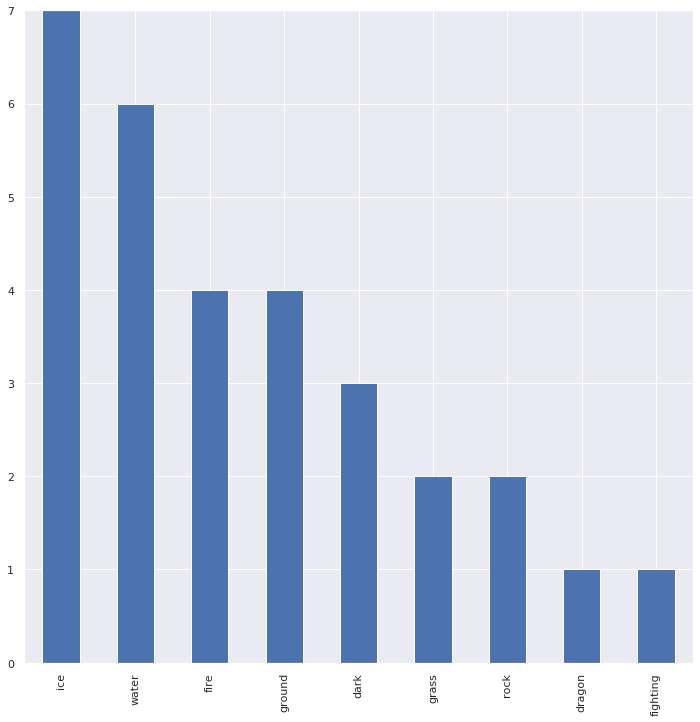

In [31]:
pd.concat([df[((df.type2 =='ice' )|(df.type1 == 'ice')) & (df.generation < 3)].type1,\
           df[(df.type2 =='ice' )|(df.type1 == 'ice') & (df.generation < 3)].type1]).value_counts().plot.bar()
print(pd.concat([df[((df.type2 =='ice' )|(df.type1 == 'ice') ) & (df.generation < 3)].type1,\
           df[(df.type2 =='ice' )|(df.type1 == 'ice') & (df.generation < 3)].type1]).value_counts().to_string())
plt.ylim(0,7)
plt.show()

In [32]:
df[df.generation < 3].loc[:,'against_bug':'against_water'].apply(lambda x: x.value_counts())\
                                                            .fillna(0).astype(int).iloc[3].sort_values(ascending =False)

against_dragon      228
against_normal      223
against_dark        195
against_ghost       181
against_fairy       169
against_psychic     167
against_flying      164
against_poison      157
against_rock        143
against_steel       141
against_water       133
against_ground      127
against_bug         118
against_electric    115
against_fire        114
against_fight       109
against_ice         109
against_grass        83
Name: 1.0, dtype: int64

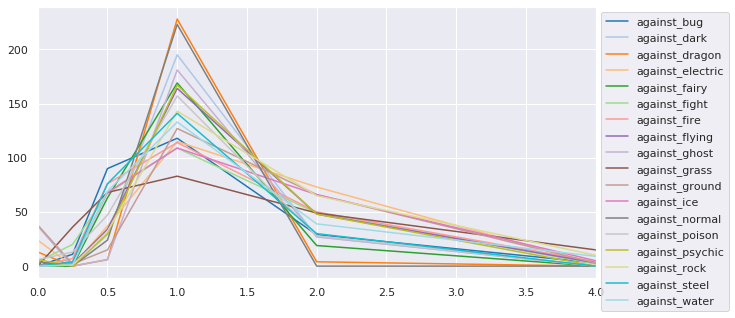

In [33]:
df[df.generation < 3].loc[:,'against_bug':'against_water'].apply(lambda x: x.value_counts()).fillna(0)\
                                                            .plot.line(figsize =(10, 5), cmap = 'tab20')\
                                                            .legend(bbox_to_anchor=(1, 1))
plt.savefig("pktypes_chart2.png", dpi = 300)
plt.show()

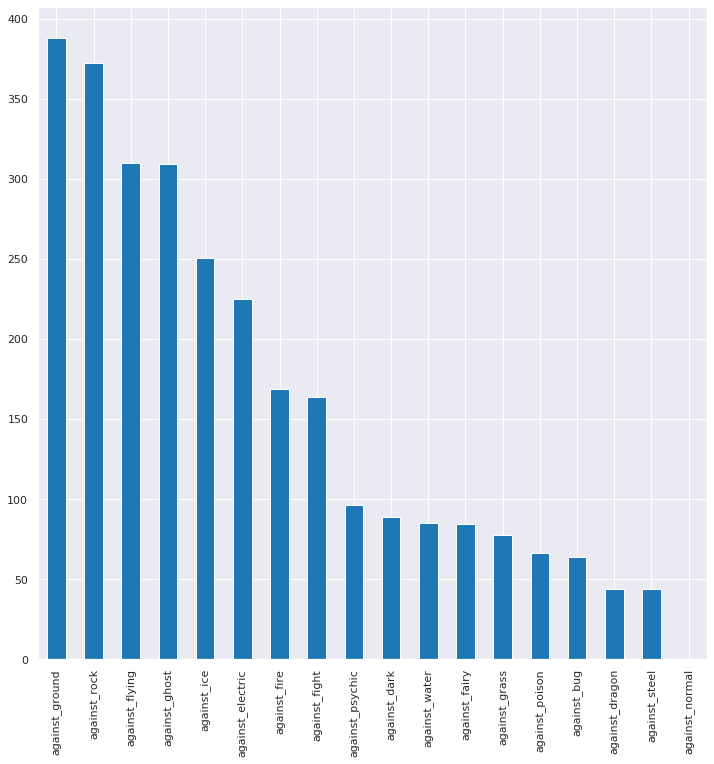

In [50]:
criticals = pd.DataFrame()
for name, series in df.loc[ : ,'against_bug':'against_water'].items():
    criticals[name]= series.value_counts(sort = False)
criticals = criticals.fillna(0)
criticals = criticals[criticals.index > 1].sum()**2 / criticals[criticals.index < 1].sum()
criticals.against_normal = 0.0
criticals.sort_values(ascending = False).plot.bar(cmap = 'tab20')
plt.show()


In [53]:
criticals 

against_bug          64.000000
against_dark         88.751938
against_dragon       44.023810
against_electric    225.121019
against_fairy        84.756757
against_fight       163.751055
against_fire        168.889344
against_flying      310.408333
against_ghost       309.428571
against_grass        77.914956
against_ground      388.245098
against_ice         251.174312
against_normal        0.000000
against_poison       66.563953
against_psychic      96.571429
against_rock        372.832061
against_steel        43.967480
against_water        84.961538
dtype: float64

In [35]:
types = np.array(df[(df.type2.isnull()) & (df.generation < 3)].type1.unique())
against = ['against_' + t for t in types]
against = ['against_fire', 'against_water', 'against_bug', 'against_poison', 'against_electric', \
           'against_fairy', 'against_fighting', 'against_psychic', 'against_ground', 'against_normal', \
           'against_grass', 'against_dragon', 'against_rock', 'against_dark', 'against_ghost']
print(types)

['fire' 'water' 'bug' 'poison' 'electric' 'fairy' 'fighting' 'psychic'
 'ground' 'normal' 'grass' 'dragon' 'rock' 'dark' 'ghost']


In [36]:
df[(df.type2.isnull()) & (df.generation < 3)].groupby('type1')['against_fire', 'against_water', 'against_bug', 'against_poison', 'against_electric', \
                                                               'against_fairy', 'against_fight', 'against_psychic', 'against_ground',\
                                                               'against_normal','against_grass', 'against_dragon', 'against_rock', 'against_dark', \
                                                               'against_ghost'].mean().fillna(0)

,against_fire,against_water,against_bug,against_poison,against_electric,against_fairy,against_fight,against_psychic,against_ground,against_normal,against_grass,against_dragon,against_rock,against_dark,against_ghost
type1,,,,,,,,,,,,,,,
bug,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.5,1.0,0.5,1.0,2.0,1.0,1.0
dark,1.0,1.0,2.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.5,0.5
dragon,0.5,0.5,1.0,1.0,0.5,2.0,1.0,1.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0
electric,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
fairy,1.0,1.0,0.5,2.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.0,1.0,0.5,1.0
fighting,1.0,1.0,0.5,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0
fire,0.5,2.0,0.5,1.0,1.0,0.5,1.0,1.0,2.0,1.0,0.5,1.0,2.0,1.0,1.0
ghost,1.0,1.0,0.5,0.5,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0
grass,2.0,0.5,2.0,2.0,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,1.0,1.0


In [37]:
heatmap=df[(df.type2.isnull()) & (df.generation < 3)].groupby('type1')['against_fire', 'against_water', 'against_bug', 'against_poison', 'against_electric', \
                                                               'against_fairy', 'against_fight', 'against_psychic', 'against_ground',\
                                                               'against_normal','against_grass', 'against_dragon', 'against_rock', 'against_dark', \
                                                               'against_ghost'].mean()
heatmap = heatmap

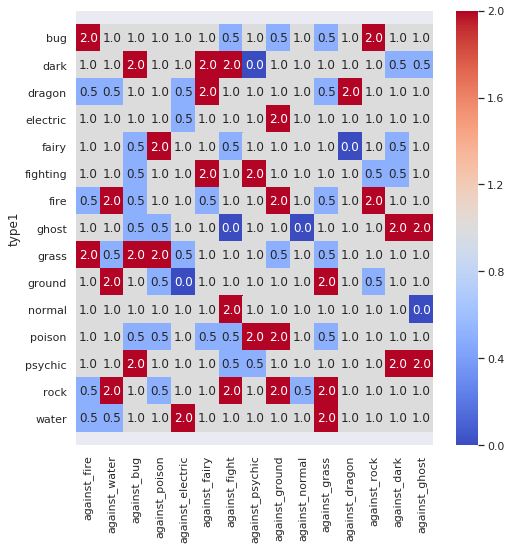

In [57]:
sns.heatmap(heatmap,
        xticklabels=heatmap.columns,
        yticklabels=heatmap.index, 
        cmap = 'coolwarm',
        annot =True, fmt =".1f")
sns.set(rc={'figure.figsize':(8, 8)})
plt.ylim(heatmap.columns.size+0.5, -0.5)
# plt.yticks(rotation = 90)
plt.show()

# ax.set_yticks(np.arange(against.size))
# ax.set_xticks(np.arange(types.size))

# ax.set_yticklabels(against)
# ax.set_xticklabels(types)

# plt.setp(ax.get_xticklabels(), rotation = 45 , ha = 'right', \
#                                      rotation_mode ='anchor')
# for i in range(against.size):
#     for j in range(types.size):
#         text = ax.text(j,i, heatmap[i,j],\
#                       ha = 'center', va= 'center', color = 'w')
# fig.set_size_inches(8, 6)
# fig.tight_layout()
# ax.set_ylim(len(heatmap)-0.5, -0.5)
# plt.style.use('fivethirtyeight')
# plt.show()

In [66]:
print(*df[df.name == 'Onix'].loc[:, 'against_bug':'against_water'].to_list())

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [ ]:
df[df.name == 'Piloswine'].loc[:, 'against_bug':'against_water'].to_dict